In [27]:
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

start = "2012/12/1"
end="2017/10/20"

price = pdr.DataReader("^N225", "yahoo", start, end)
print(price.head(1))

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-12-03  9484.200195  9525.820313  9453.480469  9458.179688  9458.179688   

              Volume  
Date                  
2012-12-03  110100.0  


In [30]:
# 日々の終値の差分を対数で計算
dp = np.log(price.Close).diff()
# 標準偏差に平日日数を掛けて対数変化率の標準偏差を出す
# アベノミクスが始まってからのボラリリティ
vol = dp.std() * np.sqrt(len(price))
print(vol*100, len(price))

# price.Close.plot(color = 'darkblue')
# plt.ylabel("N225")

48.9656439259 1200


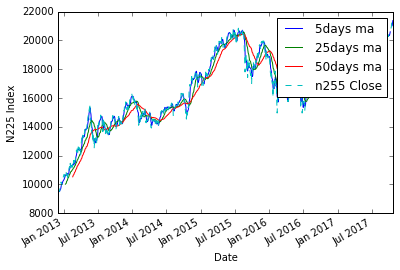

In [29]:
import pandas as pd
# アベノミクスが始まってからの日経と移動平均5,25,50
ma5 = pd.Series.rolling(price.Close, window = 5).mean()
ma5.plot(label = '5days ma')
ma25 = pd.Series.rolling(price.Close, window = 25).mean()
ma25.plot(label = '25days ma')
ma50 = pd.Series.rolling(price.Close, window = 50).mean()
ma50.plot(label = '50days ma')
price.Close.plot(label = 'n255 Close', style= '--')
plt.ylabel('N225 Index')
plt.legend()

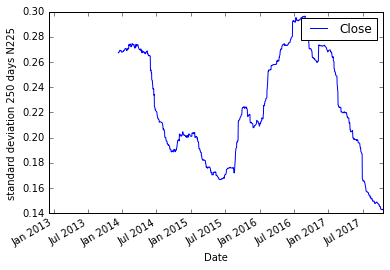

In [34]:
# ボラリリティのクラスタリング(250日)
na = np.log(price.Close).diff().dropna()
(pd.Series.rolling(na, window = 250).std() * np.sqrt(250)).plot()
plt.ylabel('standard deviation 250 days N225')
plt.legend()